In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

In [220]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [221]:
y = train['SalePrice']

In [222]:
y = train['SalePrice']
trainID = train['Id']
testID = test['Id']
train = train.drop(columns = ['SalePrice'])

In [223]:
full = pd.concat([train,test], ignore_index=True, sort = False)

In [224]:
def to_str(dataset):
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
    dataset['YrSold'] = dataset['YrSold'].astype(str)
    dataset['MoSold'] = dataset['MoSold'].astype(str)
to_str(full)
to_str(train)
to_str(test)
categorical_features = full.select_dtypes(include=[np.object])
numeric_features = full.select_dtypes(include=[np.number])

In [236]:
categorical_features.shape

(2919, 46)

In [239]:
numeric_features.shape

(2919, 34)

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


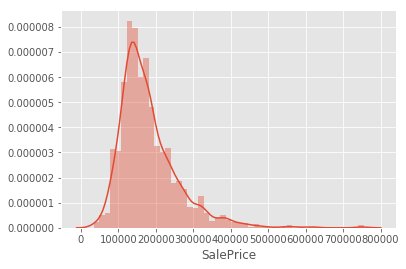

In [234]:
sns.distplot(y)

In [247]:
full.isnull().sum()[full.isnull().sum()!=0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

AttributeError: 'DataFrame' object has no attribute 'GrLiveArea'

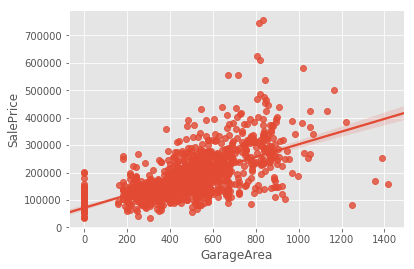

In [255]:
sns.regplot(train.GarageArea,y)

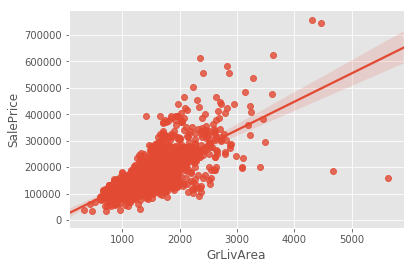

In [253]:
sns.regplot(train.GrLivArea,y)

In [249]:
full2.Neighborhood

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
5       Mitchel
6       Somerst
7        NWAmes
8       OldTown
9       BrkSide
10       Sawyer
11      NridgHt
12       Sawyer
13      CollgCr
14        NAmes
15      BrkSide
16        NAmes
17       Sawyer
18      SawyerW
19        NAmes
20      NridgHt
21       IDOTRR
22      CollgCr
23      MeadowV
24       Sawyer
25      NridgHt
26        NAmes
27      NridgHt
28        NAmes
29      BrkSide
         ...   
2889     IDOTRR
2890     IDOTRR
2891     IDOTRR
2892     IDOTRR
2893     IDOTRR
2894    Crawfor
2895    Crawfor
2896    Mitchel
2897    Mitchel
2898    Mitchel
2899    Mitchel
2900     Timber
2901     Timber
2902     Timber
2903     Timber
2904    Mitchel
2905    Mitchel
2906    MeadowV
2907    Mitchel
2908    Mitchel
2909    MeadowV
2910    MeadowV
2911    Mitchel
2912    MeadowV
2913    MeadowV
2914    MeadowV
2915    MeadowV
2916    Mitchel
2917    Mitchel
2918    Mitchel
Name: Neighborhood, Leng

In [225]:
def percent_missing(dataframe):
    return dataframe.isnull().sum()/dataframe.isnull().count()

In [226]:
missing_table = pd.concat([train.isnull().sum(),percent_missing(train),
                          test.isnull().sum(),percent_missing(test),
                          full.isnull().sum(), percent_missing(full)], axis=1, 
                         keys=['Total_train', 'Percent_train', 'Total_test', 'Percent_test',
                              'Total_full', 'Percent_full'], sort = False)

In [298]:
missing_table[missing_table.Total_full!=0]

,Total_train,Percent_train,Total_test,Percent_test,Total_full,Percent_full
MSZoning,0,0.000000,4,0.002742,4,0.001370
LotFrontage,259,0.177397,227,0.155586,486,0.166495
Alley,1369,0.937671,1352,0.926662,2721,0.932169
Utilities,0,0.000000,2,0.001371,2,0.000685
Exterior1st,0,0.000000,1,0.000685,1,0.000343
Exterior2nd,0,0.000000,1,0.000685,1,0.000343
MasVnrType,8,0.005479,16,0.010966,24,0.008222
MasVnrArea,8,0.005479,15,0.010281,23,0.007879
BsmtQual,37,0.025342,44,0.030158,81,0.027749
BsmtCond,37,0.025342,45,0.030843,82,0.028092


In [229]:
missing_table2 = missing_table[missing_table.Total_full!=0]
missing_table2

,Total_train,Percent_train,Total_test,Percent_test,Total_full,Percent_full
MSZoning,0,0.000000,4,0.002742,4,0.001370
LotFrontage,259,0.177397,227,0.155586,486,0.166495
Alley,1369,0.937671,1352,0.926662,2721,0.932169
Utilities,0,0.000000,2,0.001371,2,0.000685
Exterior1st,0,0.000000,1,0.000685,1,0.000343
Exterior2nd,0,0.000000,1,0.000685,1,0.000343
MasVnrType,8,0.005479,16,0.010966,24,0.008222
MasVnrArea,8,0.005479,15,0.010281,23,0.007879
BsmtQual,37,0.025342,44,0.030158,81,0.027749
BsmtCond,37,0.025342,45,0.030843,82,0.028092


In [232]:
missing_table2.to_csv('missing.csv',index=True)

In [253]:
test.loc[test.MSZoning.isnull(),'MSZoning'] = 'RL'
test.loc[test.Utilities.isnull(),'Utilities'] = 'AllPub'
test.loc[test.Exterior1st.isnull(),'Exterior1st'] = 'WdShing'
test.loc[test.Exterior2nd.isnull(),'Exterior2nd'] = 'Wd Shng'
train.loc[train.Electrical.isnull(),'Electrical'] = 'Sbrkr'
test.loc[test.KitchenQual.isnull(),'KitchenQual'] = 'TA'
test.loc[test.Functional.isnull(),'Functional'] = 'Typ'
test.loc[test.SaleType.isnull(),'SaleType'] = 'WD'

In [254]:
test.loc[1150,'MasVnrType'] = 'BrkFace'

In [255]:
test.loc[test.MasVnrType.isnull(),'MasVnrType'] = 'None'
test.loc[test.MasVnrArea.isnull(),'MasVnrArea'] = 0
train.loc[train.MasVnrType.isnull(),'MasVnrType'] = 'None'
train.loc[train.MasVnrArea.isnull(),'MasVnrArea'] = 0

In [256]:
test.loc[test.FireplaceQu.isnull(),'FireplaceQu'] = 'None'
train.loc[train.FireplaceQu.isnull(),'FireplaceQu'] = 'None'

In [257]:
test.loc[test.Fence.isnull(),'Fence'] = 'None'
train.loc[train.Fence.isnull(),'Fence'] = 'None'

In [258]:
test.loc[960,'PoolQC'] = 'Fa'
test.loc[1043,'PoolQC'] = 'Gd'
test.loc[1139,'PoolQC'] = 'Gd'

In [259]:
test.loc[test.PoolQC.isnull(),'PoolQC'] = 'None'
train.loc[train.PoolQC.isnull(),'PoolQC'] = 'None'

In [260]:
test.loc[1089,'MiscFeature'] = 'Shed'

In [261]:
test.loc[test.MiscFeature.isnull(),'MiscFeature'] = 'None'
train.loc[train.MiscFeature.isnull(),'MiscFeature'] = 'None'

In [262]:
test.loc[test.Alley.isnull(),'Alley'] = 'None'
train.loc[train.Alley.isnull(),'Alley'] = 'None'

In [263]:
# Basement columns
# Impute id 2189 and 2121 numeric NA values to 0 since they are missing and 
# there is no evidence to support that there is a number for them.
test[test.Id==2189].index
test.loc[728,'BsmtFullBath']=0
test.loc[728,'BsmtHalfBath']=0
test[test.Id==2121].index
test.loc[660,'BsmtFinSF1']=0
test.loc[660,'BsmtFinSF2']=0
test.loc[660,'BsmtUnfSF']=0
test.loc[660,'BsmtFullBath']=0
test.loc[660,'TotalBsmtSF']=0
test.loc[660,'BsmtHalfBath']=0

In [264]:
#BsmtFinType1
train.loc[train.BsmtFinType1.isnull(),'BsmtFinType1'] = 'None'
test.loc[test.BsmtFinType1.isnull(),'BsmtFinType1'] = 'None'

In [265]:
#BsmtFinType2
train.loc[332,'BsmtFinType2'] = 'Unf'

In [266]:
train.loc[train.BsmtFinType2.isnull(),'BsmtFinType2'] = 'None'
test.loc[test.BsmtFinType2.isnull(),'BsmtFinType2'] = 'None'

In [267]:
#BsmtExposure
train.loc[948,'BsmtExposure'] = 'Gd'
test.loc[27,'BsmtExposure'] = 'Gd'
test.loc[888,'BsmtExposure'] = 'Gd'

In [268]:
#BsmtCond
test.loc[580,'BsmtCond'] = 'TA'
test.loc[725,'BsmtCond'] = 'Gd'
test.loc[1064,'BsmtCond'] = 'TA'

In [269]:
#BsmtQual
test.loc[757,'BsmtQual'] = 'Gd'
test.loc[758,'BsmtQual'] = 'TA'

In [270]:
train.loc[train.BsmtExposure.isnull(),'BsmtExposure'] = 'None'
test.loc[test.BsmtExposure.isnull(),'BsmtExposure'] = 'None'
train.loc[train.BsmtCond.isnull(),'BsmtCond'] = 'None'
test.loc[test.BsmtCond.isnull(),'BsmtCond'] = 'None'
train.loc[train.BsmtQual.isnull(),'BsmtQual'] = 'None'
test.loc[test.BsmtQual.isnull(),'BsmtQual'] = 'None'

In [271]:
# Garage Data Id 2577 house misses all garage data and only the garage data.
test.loc[1116,'GarageYrBlt'] = 0
test.loc[1116,'GarageFinish'] = 'None'
test.loc[1116,'GarageCars'] = 0
test.loc[1116,'GarageArea'] = 0 
test.loc[1116,'GarageQual'] = 'None'
test.loc[1116,'GarageCond'] = 'None'

In [272]:
# Another missing point is Id 2127 house, where there is an area for the
# garage, but there is no information for the yearbuilt, garagefinish,
# garagequal and garagecond. I will impute those values with the most
# similar data point in the dataset. 
test.loc[666,'GarageYrBlt'] = 1956
test.loc[666,'GarageFinish'] = 'Unf'
test.loc[666,'GarageQual'] = 'TA'
test.loc[666,'GarageCond'] = 'TA'

In [273]:
# Now that all NA values in the garage columns are those that don't have 
# a garage. So we can transform year to 0 and categorical features to
# 'None'
train.loc[train.GarageYrBlt.isnull(),'GarageYrBlt'] = 0
test.loc[test.GarageYrBlt.isnull(),'GarageYrBlt'] = 0
train.loc[train.GarageFinish.isnull(),'GarageFinish'] = 'None'
test.loc[test.GarageFinish.isnull(),'GarageFinish'] = 'None'
train.loc[train.GarageQual.isnull(),'GarageQual'] = 'None'
test.loc[test.GarageQual.isnull(),'GarageQual'] = 'None'
train.loc[train.GarageCond.isnull(),'GarageCond'] = 'None'
test.loc[test.GarageCond.isnull(),'GarageCond'] = 'None'
train.loc[train.GarageType.isnull(),'GarageType'] = 'None'
test.loc[test.GarageType.isnull(),'GarageType'] = 'None'

In [274]:
# How to handle this column needs attention. I will try several ways
# to do it. The first way is to take it as 0. 

In [275]:
# However this is risky because there is no 0 value in the dataset, 
# suggesting that perhaps 0 is not a reasonable number for this 
# variable. 

In [276]:
train.loc[train.LotFrontage.isnull(),'LotFrontage'] = 0
test.loc[test.LotFrontage.isnull(),'LotFrontage'] = 0

In [277]:
full2 = pd.concat([train,test], ignore_index=True, sort = False)

In [278]:
misstable2 = pd.concat([train.isnull().sum(),percent_missing(train),
                          test.isnull().sum(),percent_missing(test),
                          full2.isnull().sum(), percent_missing(full2)], axis=1, 
                         keys=['Total_train', 'Percent_train', 'Total_test', 'Percent_test',
                              'Total_full', 'Percent_full'], sort = False)
misstable2[misstable2.Total_full!=0]

,Total_train,Percent_train,Total_test,Percent_test,Total_full,Percent_full


In [171]:
# Now there is no missing values in the dataset. 
# one-hot coding for the first round. 

In [234]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(oob_score=True, random_state=42)
randomForest.fit(x_train,y)

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [235]:
randomForest.oob_score_

0.7057272443702111

In [279]:
one_hot_full2 = pd.get_dummies(full2,drop_first=True,dummy_na=False)


In [280]:
x_train = one_hot_full2.iloc[:1460,1:]

In [281]:
x_test = one_hot_full2.iloc[1460:,1:]

In [282]:
x_train.shape

(1460, 287)

In [283]:
x_test.shape

(1459, 287)

In [285]:
from sklearn.ensemble import GradientBoostingRegressor

In [286]:
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 5) 
    
myGBR.fit(x_train,y)
pred_train_GBR = myGBR.predict(x_train)

pred_test_GBR = myGBR.predict(x_test)

In [239]:
from sklearn.metrics import mean_squared_error

In [240]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [287]:
pred_train_GBR

array([208582.55770425, 174429.31675395, 214792.84693745, ...,
       263850.52060748, 140483.93558618, 148766.05129631])

In [242]:
rmsle(y,pred_train_GBR)

0.07697207130663204

In [288]:
pred_test_GBR

array([123456.27060771, 161034.24201721, 190254.43505381, ...,
       169706.69641506, 122463.23448554, 220482.23191027])

In [289]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': pred_test_GBR})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [300]:
from scipy.stats import chisquare

In [213]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
   def __init__(self, dataframe):
       self.df = dataframe
       self.p = None #P-Value
       self.chi2 = None #Chi Test Statistic
       self.dof = None

       self.dfObserved = None
       self.dfExpected = None

   def _print_chisquare_result(self, colX, alpha):
       result = ""
       if self.p<alpha:
           result="{0} is IMPORTANT for Prediction".format(colX)
       else:
           result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

       print(result)

   def TestIndependence(self,colX,colY, alpha=0.05):
       X = self.df[colX].astype(str)
       Y = self.df[colY].astype(str)

       self.dfObserved = pd.crosstab(Y,X)
       chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
       self.p = p
       self.chi2 = chi2
       self.dof = dof

       self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

       self._print_chisquare_result(colX,alpha)

In [ ]:
cT = ChiSquare(df)

#Feature Selection
testColumns = ['BsmtQual']
for var in testColumns:
   cT.TestIndependence(colX=,colY="Survived" )

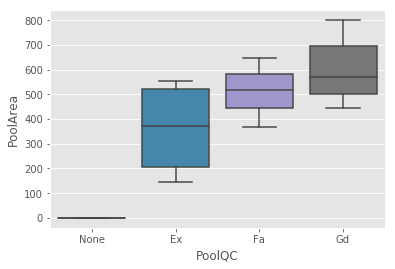

In [216]:
sns.boxplot(full2.PoolQC,full2.PoolArea)

/Users/lujian/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


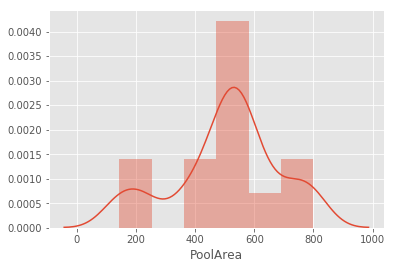

In [218]:
sns.distplot(full2.PoolArea[full2.PoolArea!=0])